In [4]:
import keras
keras.__version__

'2.2.4'

## IMDB 数据集-电影评论-二分类问题
训练数据：25000条，50%正面，负面50%   
测试数据：25000条，50%正面，负面50%   
1、字典中的单词是按照词频排的   
2、保留字典中序号小于10000的单词   
3、数据：array(list1, ... list25000)  (25000,)      
4、标签：array(0,1 ... 0)         (25000,)

In [7]:
from keras.datasets import imdb
import numpy as np
#(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
np.load = np_load_old

In [3]:
train_data         # array(list1, ... list25000) (25000,) dtype=object   [0,9999]      训练数据 x

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [119]:
train_labels      # array(0,1 ... 0)             (25000,) dtype=int64   0(50%)|1(50%)  训练数据 y  

(25000,)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [5]:
test_data         # array(list1, ... list25000) (25000,) dtype=object   [0,9999]       测试数据 x

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [4]:
test_labels       # array(0,1 ... 0)             (25000,) dtype=int64   0(50%)|1(50%)  测试数据 y

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [12]:
word_index = imdb.get_word_index()                                                    # 字典{'word' , num}
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])      # 字典{num , 'word'}
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])  # 文本内容
decoded_review

## 预处理数据

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)            # array  (25000, 10000)   0|1
x_test = vectorize_sequences(test_data)              # array  (25000, 10000)   0|1
y_train = np.asarray(train_labels).astype('float32') # array  (25000,)         0|1
y_test  = np.asarray(test_labels).astype('float32')  # array  (25000,)         0|1

In [13]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(25000, 10000)

(25000, 10000)

(25000,)

(25000,)

## 构建网络

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
from keras import losses
from keras import metrics
                                                        
model.compile(optimizer=optimizers.RMSprop(lr=0.001),   # 配置自定义优化器参数：传入一个优化器类实例
              loss=losses.binary_crossentropy,          # 配置自定义  损失函数：传入一个函数对象
              metrics=[metrics.binary_accuracy])        # 配置自定义  指标函数：传入一个函数对象

## 验证精度


In [5]:
x_val = x_train[:10000]             # 留出前10000个样本来验证精度
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
history = model.fit(partial_x_train,                 # 返回一个History对象
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))  # 传入验证数据
history_dict = history.history
history_dict.keys()

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 148us/step - loss: 0.0096 - acc: 0.9975 - val_loss: 0.7308 - val_acc: 0.8661
Epoch 2/10
15000/15000 [==============================] - 2s 136us/step - loss: 0.0023 - acc: 0.9999 - val_loss: 0.7459 - val_acc: 0.8658
Epoch 3/10
15000/15000 [==============================] - 2s 135us/step - loss: 0.0058 - acc: 0.9986 - val_loss: 0.7838 - val_acc: 0.8643
Epoch 4/10
15000/15000 [==============================] - 2s 136us/step - loss: 0.0016 - acc: 0.9999 - val_loss: 0.8010 - val_acc: 0.8632
Epoch 5/10
15000/15000 [==============================] - 2s 133us/step - loss: 0.0064 - acc: 0.9981 - val_loss: 0.8398 - val_acc: 0.8633
Epoch 6/10
15000/15000 [==============================] - 2s 138us/step - loss: 9.9218e-04 - acc: 0.9999 - val_loss: 0.8510 - val_acc: 0.8631
Epoch 7/10
15000/15000 [==============================] - 2s 136us/step - loss: 8.6348e-04 - acc: 0.9999 - val_loss: 0

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [30]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(loss) + 1)

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

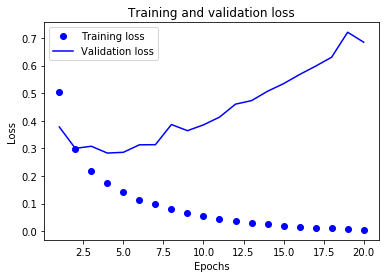

In [31]:
plt.plot(epochs, loss, 'bo', label='Training loss')          # "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'b', label='Validation loss')     # b is for "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

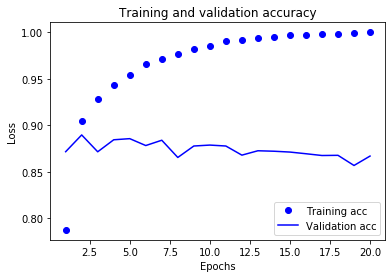

In [32]:
plt.clf()   # 清空图像
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 从头开始训练一个模型

In [37]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 3s 129us/step - loss: 0.4781 - acc: 0.8266
Epoch 2/4
25000/25000 [==============================] - 3s 111us/step - loss: 0.2785 - acc: 0.9074
Epoch 3/4
25000/25000 [==============================] - 3s 111us/step - loss: 0.2091 - acc: 0.9276
Epoch 4/4
25000/25000 [==============================] - 3s 136us/step


[0.3048839328289032, 0.8788]

## 评估、预测

In [38]:
model.evaluate(x_test, y_test)  # 评估
model.predict(x_test)           # 预测

25000/25000 [==============================] - 3s 135us/step


[0.3048839328289032, 0.8788]

array([[0.15853417],
       [0.9999398 ],
       [0.78053904],
       ...,
       [0.11246827],
       [0.05804241],
       [0.4017935 ]], dtype=float32)